In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/zeel/ZEEL (20240930093400000 _ 20240925105700000).csv')
data

,Date,Open,High,Low,Close,Jaw ‌Alligator‌,Teeth ‌Alligator,Lips ‌Alligator,MA5,MA15,Volume,Volume Change Percentage
0,Wed Sep 25 2024 10:57:00 GMT+0530 (India Stand...,128.35,128.36,128.27,128.34,127.57,127.87,128.47,128.42,128.54,8697.0,-68.27
1,Wed Sep 25 2024 10:58:00 GMT+0530 (India Stand...,128.34,128.40,128.32,128.39,127.58,127.96,128.44,128.38,128.55,18923.0,-85.49
2,Wed Sep 25 2024 10:59:00 GMT+0530 (India Stand...,128.37,128.39,128.30,128.34,127.60,128.06,128.42,128.36,128.54,17725.0,-63.08
3,Wed Sep 25 2024 11:00:00 GMT+0530 (India Stand...,128.34,128.35,128.30,128.35,127.61,128.14,128.41,128.35,128.52,4863.0,-95.12
4,Wed Sep 25 2024 11:01:00 GMT+0530 (India Stand...,128.35,128.40,128.30,128.35,127.65,128.18,128.39,128.35,128.49,10833.0,-74.49
...,...,...,...,...,...,...,...,...,...,...,...,...
1018,Fri Sep 27 2024 15:25:00 GMT+0530 (India Stand...,135.14,135.38,135.05,135.17,135.74,135.88,135.50,135.27,135.70,96944.0,-58.69
1019,Fri Sep 27 2024 15:26:00 GMT+0530 (India Stand...,135.15,135.37,135.10,135.10,135.75,135.88,135.45,135.23,135.64,123132.0,-33.40
1020,Fri Sep 27 2024 15:27:00 GMT+0530 (India Stand...,135.15,135.30,135.06,135.30,135.76,135.88,135.40,135.23,135.61,119850.0,-36.70
1021,Fri Sep 27 2024 15:28:00 GMT+0530 (India Stand...,135.24,135.30,135.05,135.10,135.77,135.87,135.36,135.17,135.55,122398.0,-57.00


In [3]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Jaw ‌Alligator‌',
       'Teeth ‌Alligator', 'Lips ‌Alligator', 'MA5', 'MA15', 'Volume',
       'Volume Change Percentage'],
      dtype='object')

In [4]:
data = data.to_numpy()
data = data[:, 1:] # removing the dates column

In [5]:
## print(data.shape)
data[1021:1024]

array([[135.24, 135.3, 135.05, 135.1, 135.77, 135.87, 135.36, 135.17,
        135.55, 122398.0, -57.0],
       [135.24, 135.25, 135.05, 135.15, 135.78, 135.83, 135.32, 135.16,
        135.5, 141743.0, -35.77]], dtype=object)

In [6]:
X, y = [], []

In [7]:
X, y = [], []
last_candles_count = 5
next_candles_count = 3

for idx, row in enumerate(data[last_candles_count-1 : 
    -(next_candles_count+1)]):
    idx = idx + last_candles_count + 1
    first_open = data[idx-last_candles_count-1][0]
    first_jaw = data[idx-last_candles_count-1][4]
    first_lip = data[idx-last_candles_count-1][6]
    first_teeth = data[idx-last_candles_count-1][5]
    first_ma5 = data[idx-last_candles_count-1][7]
    first_ma15 = data[idx-last_candles_count-1][8]
    first_volumn = data[idx-last_candles_count-1][9]
    first_volumn_change = data[idx-last_candles_count-1][10]
    last_candles = []
    for candle in data[idx-last_candles_count : idx]:
        temp = []
        temp.append(round(candle[0]-first_open, 2))
        temp.append(round(candle[1]-first_open, 2))
        temp.append(round(candle[2]-first_open, 2))
        temp.append(round(candle[3]-first_open, 2))
        temp.append(round(candle[4]-first_jaw, 2))
        temp.append(round(candle[5]-first_teeth, 2))
        temp.append(round(candle[6]-first_lip, 2))
        temp.append(round(candle[7]-first_ma5, 2))
        temp.append(round(candle[8]-first_ma15, 2))
        # temp.append(round(candle[9]-first_volumn, 2))
        temp.append(round(candle[10]-first_volumn_change, 2))
        # for param in candle:
        #     temp.append(round(param-first_open, 2))
        last_candles.append(temp)
    X.append(last_candles)
    next_candles = []
    for candle in data[idx: idx+next_candles_count]:
        temp = []
        temp.append(round(candle[0]-first_open, 2))
        # temp.append(round(candle[1]-first_open, 2))
        # temp.append(round(candle[2]-first_open, 2))
        # temp.append(round(candle[3]-first_open, 2))
        # temp.append(round(candle[4]-first_jaw, 2))
        # temp.append(round(candle[5]-first_teeth, 2))
        # temp.append(round(candle[6]-first_lip, 2))
        # temp.append(round(candle[7]-first_ma5, 2))
        # temp.append(round(candle[8]-first_ma15, 2))
        # temp.append(round(candle[9]-first_volumn, 2))
        # temp.append(round(candle[10]-first_volumn_change, 2))
        
        # for param in candle:
        #     temp.append(round(param-first_open, 2))
        next_candles.append(temp[0])
    y.append(next_candles)

In [8]:
print("data:\n", data[:8])
print("-1 data:\n", data[-1])
print("\nX:", X[0])
print("\ny:", y[0])
print("X.shape:", np.array(X).shape, "y.shape:", np.array(y).shape)

data:
 [[128.35 128.36 128.27 128.34 127.57 127.87 128.47 128.42 128.54 8697.0
  -68.27]
 [128.34 128.4 128.32 128.39 127.58 127.96 128.44 128.38 128.55 18923.0
  -85.49]
 [128.37 128.39 128.3 128.34 127.6 128.06 128.42 128.36 128.54 17725.0
  -63.08]
 [128.34 128.35 128.3 128.35 127.61 128.14 128.41 128.35 128.52 4863.0
  -95.12]
 [128.35 128.4 128.3 128.35 127.65 128.18 128.39 128.35 128.49 10833.0
  -74.49]
 [128.38 128.5 128.24 128.49 127.68 128.22 128.38 128.38 128.48 53924.0
  33.19]
 [128.5 128.58 128.32 128.32 127.71 128.27 128.38 128.37 128.46 70777.0
  291.9]
 [128.36 128.6 128.36 128.6 127.75 128.33 128.39 128.42 128.47 75204.0
  33.82]]
-1 data:
 [135.24 135.25 135.05 135.15 135.78 135.83 135.32 135.16 135.5 141743.0
 -35.77]

X: [[-0.01, 0.05, -0.03, 0.04, 0.01, 0.09, -0.03, -0.04, 0.01, -17.22], [0.02, 0.04, -0.05, -0.01, 0.03, 0.19, -0.05, -0.06, 0.0, 5.19], [-0.01, 0.0, -0.05, 0.0, 0.04, 0.27, -0.06, -0.07, -0.02, -26.85], [0.0, 0.05, -0.05, 0.0, 0.08, 0.31, -0.08, -0.0

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape, InputLayer, Flatten
from sklearn.model_selection import train_test_split

In [10]:
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), test_size=0.05, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((964, 5, 10), (964, 3), (51, 5, 10), (51, 3))

In [11]:
model = Sequential()
model.add(LSTM(200, input_shape=(5, 10), activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(150, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(3))
# model.add(Reshape((3, 11)))
model.compile(optimizer='adam', loss='mse')

/Users/anodic_passion/PycharmProjects/108decillion/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# model = Sequential(
#     [
#         Flatten(input_shape=(5, 10)),  # Flatten the 3D input to 2D
#         Dense(1000, activation='relu'),
#         Dense(600, activation='relu'),
#         Dropout(0.2),
#         Dense(400, activation='relu'),
#         Dense(150, activation='relu'),
#         Dropout(0.2),
#         Dense(3, activation='relu'),
#         # Reshape((3, 11))
#         # Dense(55, activation='relu'),
#         # Dense(3, activation='relu'),
#     ]
# )

# model.compile(optimizer='adam', loss='mae')

In [13]:
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2)

Epoch 1/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.4046 - val_loss: 0.4111
Epoch 2/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2419 - val_loss: 0.4158
Epoch 3/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2861 - val_loss: 0.3093
Epoch 4/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2023 - val_loss: 0.2841
Epoch 5/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1809 - val_loss: 0.2689
Epoch 6/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1942 - val_loss: 0.2661
Epoch 7/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2092 - val_loss: 0.2311
Epoch 8/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1986 - val_loss: 0.2585
Epoch 9/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2041 - val_loss: 0.2628
Epoch 10/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1577 - val_loss: 0.2116
Epoch 11/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1376 - val_loss: 0.2581
Epoch 12/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.

In [14]:
X.shape, y.shape

(TensorShape([1015, 5, 10]), TensorShape([1015, 3]))

In [15]:
y_pred = model.predict(X[0:1])
y_pred, [0.15, 0.01, 0.35]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


(array([[ 0.11259787, -0.00322185,  0.28811353]], dtype=float32),
 [0.15, 0.01, 0.35])

In [16]:
y_pred = model.predict(X_test)
y_pred

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[ 0.02554539,  0.02292956,  0.04101183],
       [ 0.01342135, -0.04703605, -0.14950806],
       [ 1.0528287 ,  1.0963111 ,  0.8502991 ],
       [ 0.02068024, -0.13486128, -0.1753816 ],
       [-0.04236407, -0.03893517, -0.01205875],
       [ 0.06725314,  0.05880538,  0.02363979],
       [-0.00274005, -0.02755912, -0.08149926],
       [-0.6919359 , -0.7013967 , -0.6128967 ],
       [ 0.6378216 ,  0.5176753 ,  0.41167006],
       [ 0.01099604,  0.01304395, -0.00209409],
       [-0.04427301,  0.09022772,  0.07538323],
       [-0.40164518, -0.33017725, -0.24416271],
       [ 0.00612303, -0.04785159, -0.09544457],
       [-0.17156601, -0.16836117, -0.22981426],
       [-0.19060782, -0.19299595, -0.21599934],
       [-0.3724818 , -0.35752106, -0.33619007],
       [-0.0092281 ,  0.03309971,  0.01855337],
       [ 0.12989002,  0.11528658,  0.10953282],
       [-0.00425979, -0.11344571, -0.21605664],
       [-0.13724953, -0.13531192, -0.17710072],
       [ 0.04456556,  0.00555532, -0.023

In [17]:
for y_p, y_t in zip(y_pred, y_test):
    print("\n", (y_t[0]-y_p[0]), "\t", (y_t[1]-y_p[1]), "\t", (y_t[2]-y_p[2]))


 0.024454612 	 -0.042929564 	 0.018988166

 -0.04342135 	 -0.19296394 	 -0.13049194

 1.1971713 	 0.6436889 	 0.7497009

 -0.0106802415 	 0.24486127 	 0.2653816

 0.09236407 	 0.09893517 	 0.07205875

 0.07274686 	 0.07119462 	 0.7163602

 0.022740047 	 0.027559116 	 0.051499262

 -0.008064091 	 0.051396728 	 0.21289667

 1.0121784 	 2.7123246 	 2.95833

 -0.040996045 	 0.046956044 	 0.17209409

 0.064273015 	 -0.15022773 	 -0.17538324

 0.0016451776 	 -0.09982276 	 -0.2558373

 0.11387697 	 0.1678516 	 0.21544456

 0.03156601 	 -0.08163883 	 -0.05018574

 -0.04939218 	 0.022995949 	 -0.014000669

 0.12248179 	 -0.05247894 	 -0.23380992

 -0.19077191 	 -0.4430997 	 0.06144663

 0.060109973 	 -0.07528658 	 -0.07953282

 0.4142598 	 0.3734457 	 0.34605664

 0.007249534 	 0.045311913 	 0.13710073

 -0.08456556 	 0.034444682 	 -0.046224765

 -0.2430476 	 -1.0424337 	 -0.9890208

 -0.08118236 	 0.051208198 	 -0.06185627

 -0.12309331 	 -0.048922777 	 0.14803517

 0.15767112 	 0.08309181 	 

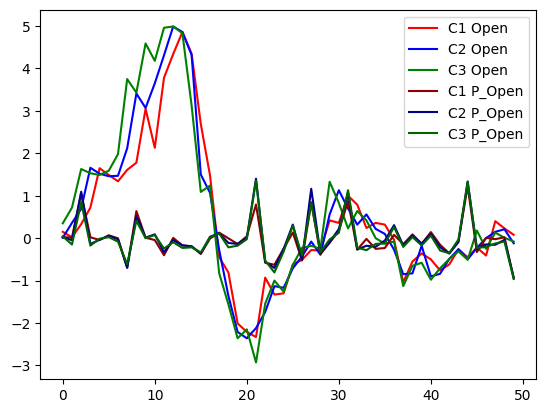

In [18]:
import matplotlib.pyplot as plt

# Example for the first feature (e.g., Close price)
plt.plot(y[:50, 0], label='C1 Open', color="red")
plt.plot(y[:50, 1], label='C2 Open', color="blue")
plt.plot(y[:50, 2], label='C3 Open', color="green")
plt.plot(y_pred[:50, 0], label='C1 P_Open', color="darkred")
plt.plot(y_pred[:50, 1], label='C2 P_Open', color="darkblue")
plt.plot(y_pred[:50, 2], label='C3 P_Open', color="darkgreen")
plt.legend()
plt.show()

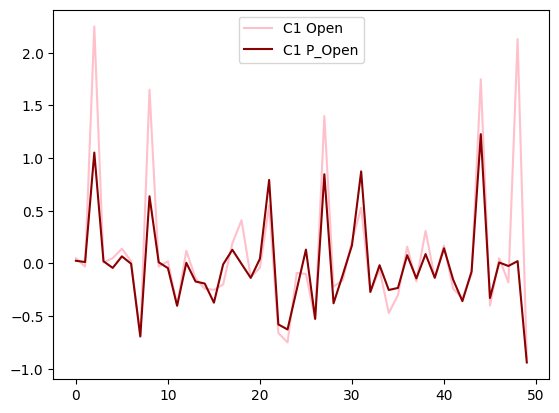

In [19]:
import matplotlib.pyplot as plt

# Example for the first feature (e.g., Close price)
plt.plot(y_test[:50, 0], label='C1 Open', color="pink")
# plt.plot(y[0:5, 1], label='C2 Open', color="blue")
# plt.plot(y[0:5, 2], label='C3 Open', color="green")
plt.plot(y_pred[:50, 0], label='C1 P_Open', color="darkred")
# plt.plot(y_pred[0:5, 1], label='C2 P_Open', color="darkblue")
# plt.plot(y_pred[0:5, 2], label='C3 P_Open', color="darkgreen")
plt.legend()
plt.show()

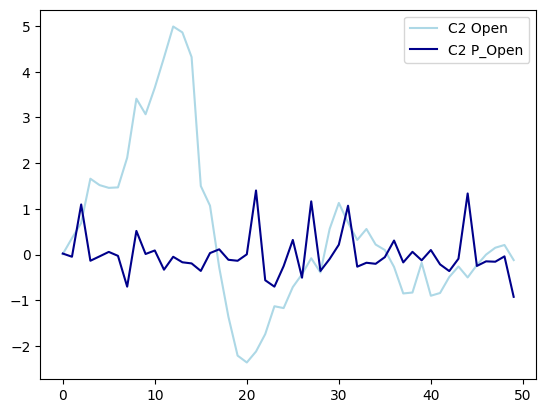

In [20]:
import matplotlib.pyplot as plt

# Example for the first feature (e.g., Close price)
# plt.plot(y[0:5, 0], label='C1 Open', color="red")
plt.plot(y[:50, 1], label='C2 Open', color="lightblue")
# plt.plot(y[0:5, 2], label='C3 Open', color="green")
# plt.plot(y_pred[0:5, 0], label='C1 P_Open', color="darkred")
plt.plot(y_pred[:50, 1], label='C2 P_Open', color="darkblue")
# plt.plot(y_pred[0:5, 2], label='C3 P_Open', color="darkgreen")
plt.legend()
plt.show()

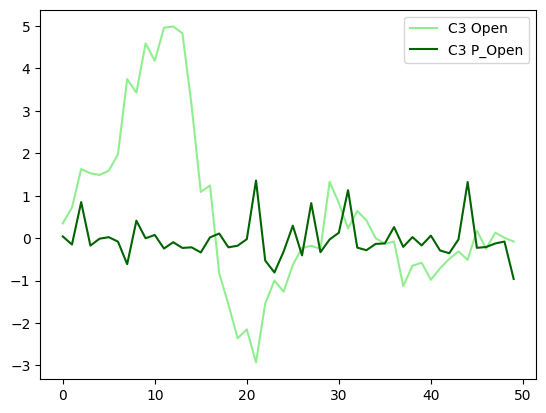

In [21]:
import matplotlib.pyplot as plt

# Example for the first feature (e.g., Close price)
# plt.plot(y[0:5, 0], label='C1 Open', color="red")
# plt.plot(y[0:5, 1], label='C2 Open', color="blue")
plt.plot(y[:50, 2], label='C3 Open', color="lightgreen")
# plt.plot(y_pred[0:5, 0], label='C1 P_Open', color="darkred")
# plt.plot(y_pred[0:5, 1], label='C2 P_Open', color="darkblue")
plt.plot(y_pred[:50, 2], label='C3 P_Open', color="darkgreen")
plt.legend()
plt.show()

In [22]:
y[0:5], y_pred[0:5]

(<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
 array([[0.15, 0.01, 0.35],
        [0.02, 0.36, 0.72],
        [0.33, 0.69, 1.63],
        [0.72, 1.66, 1.53],
        [1.65, 1.52, 1.49]], dtype=float32)>,
 array([[ 0.02554539,  0.02292956,  0.04101183],
        [ 0.01342135, -0.04703605, -0.14950806],
        [ 1.0528287 ,  1.0963111 ,  0.8502991 ],
        [ 0.02068024, -0.13486128, -0.1753816 ],
        [-0.04236407, -0.03893517, -0.01205875]], dtype=float32))